# Exact solution of poisson equation

In [159]:
using Pkg
Pkg.activate("/Users/beckers/Google Drive/Academic/UCLA/CodingInProgress/ViscousFlow.jl");
using ViscousFlow
using Plots
using LinearAlgebra
using DifferentialEquations
# pyplot()
clibrary(:colorbrewer)
default(grid = false)

### Eulerian grid

In [227]:
nx = 32; ny = 32;
Lx = 2.0;
dx = Lx/(nx-2);
display(dx)
w_dual_vorticity = Nodes(Dual,(nx,ny));
w_dual_lgf = Nodes(Dual,(nx,ny));
w_dual_biot_savart = Nodes(Dual,(nx,ny));
xg,yg = coordinates(w_dual_vorticity,dx=dx);
coord = [(x,y) for x in xg, y in yg];

0.06666666666666667

### Lagrangian points

In [228]:
# xp = VectorData([2*rand()],[2*rand()])
xp = VectorData([1.0+dx/4],[1.0+dx/4])
# xp = VectorData([1.0+dx/2],[1.0+dx/2])
# xp = VectorData([1.0],[1.0])
Γ = ScalarData([1.0]);
f_scalar = ScalarData(xp)
f_vector = VectorData(xp)

1 points of vector-valued data
1×2 Array{Float64,2}:
 0.0  0.0

In [229]:
Hw = Regularize(xp,dx;ddftype=Fields.Witchhat,issymmetric=true)
Hw(w_dual_vorticity,Γ)

Nodes{Dual,32,32} data
Printing in grid orientation (lower left is (1,1))
32×32 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     

In [230]:
# Biot-Savart
w_dual_biot_savart .= 0
xw,yw = coordinates(w_dual_biot_savart,dx=dx)
for iwv in 1:nx, jwv in 1:ny
    if w_dual_vorticity[iwv,jwv] != 0
        for iw in 1:nx, jw in 1:ny
            if iw!=iwv || jw!=jwv
                w_dual_biot_savart[iw,jw] += 
                    -w_dual_vorticity[iwv,jwv]/(2*π)*log(sqrt((xw[iw]/dx-xw[iwv]/dx)^2+(yw[jw]/dx-yw[jwv]/dx)^2))
            end
        end
    end
end

# LGF
L = plan_laplacian(size(w_dual_vorticity),with_inverse=true)
L⁻¹(w::T) where {T} = L\w;
w_dual_lgf .= -(L\(w_dual_vorticity));

In [231]:
w_dual_error = w_dual_lgf - w_dual_biot_savart;
for iwv in 1:nx, jwv in 1:ny
    if w_dual_vorticity[iwv,jwv] != 0
        w_dual_error[iwv,jwv] = 0
    end
end
norm(w_dual_error)

0.00039037570028889793

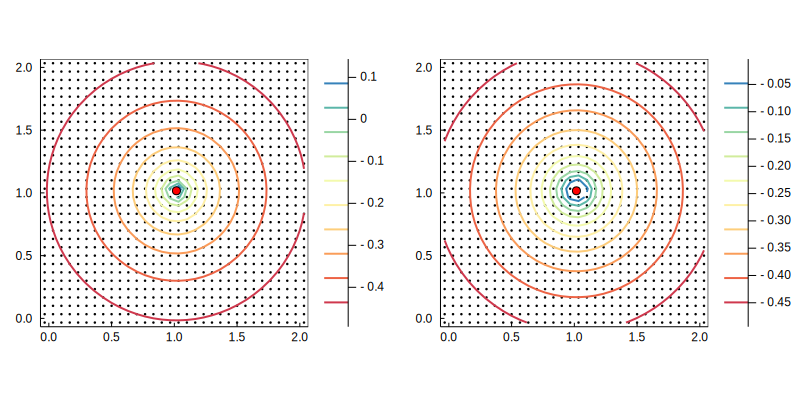

In [242]:
xg,yg = coordinates(w_dual_lgf,dx=dx);
coord = [(x,y) for x in xg, y in yg];
p1 = scatter(first.(coord)[:],last.(coord)[:],markercolor=:black,markerstrokecolor=:black,ratio=:equal,
    markersize=0.5,legend=true)
plot!(xg,yg,w_dual_lgf,levels=10,linewidth=2,xlims=(-dx,Lx+dx),ylims=(-dx,Lx+dx),legend=false,size=[400,400])
scatter!(xp.u,xp.v,markercolor=:red)

xg,yg = coordinates(w_dual_biot_savart,dx=dx);
coord = [(x,y) for x in xg, y in yg];
p2 = scatter(first.(coord)[:],last.(coord)[:],markercolor=:black,markerstrokecolor=:black,ratio=:equal,
    markersize=0.5,legend=true)
plot!(xg,yg,w_dual_biot_savart,levels=10,linewidth=2,xlims=(-dx,Lx+dx),ylims=(-dx,Lx+dx),legend=false,size=[400,400])
scatter!(xp.u,xp.v,markercolor=:red)

plot(p1,p2,layout=2,size=[800,400])

# display(p1)
# display(p2)

In [233]:
w_dual_biot_savart[5,6]

-0.4405311789494176

In [234]:
# -0.5625/(2π)*log(dx)-0.1875/(2π)*log(sqrt(2)*dx)-0.1875/(2π)*log(2*dx)-0.0625/(2π)*log(sqrt(5)*dx)
# -1/(2π)*log(dx)

In [235]:
-1/(2π)*log(sqrt((xg[5]/dx-xp.u[1]/dx)^2+(yg[6]/dx-xp.v[1]/dx)^2))

-0.4405294868369026

In [236]:
w_dual_lgf[5,6]

-0.44058234091334636

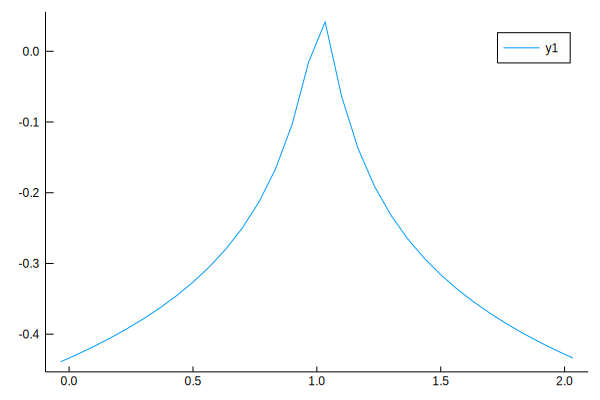

In [261]:
x_range = xg[1:nx]
plot(x_range,w_dual_lgf[1:nx,Int(ny/2)])